In [1]:
# Import data from CSV files
from csv import DictReader

with open('_data/fluidized_bed.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_fb = [r for r in reader]
csv_file.close()

with open('_data/batch_reactor.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_br = [r for r in reader]
csv_file.close()

with open('_data/tubular_reactor.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_tr = [r for r in reader]
csv_file.close()

INPUT_VARS = [
    'Flow Rate (SLM)',
    'Reaction Time (s)',
    'Temperature (C)',
    'HVF (C)',
    'Particle size (mm)',
    'Steam feeding rate (ml/min)',
    'Solid residence time(min)',
    'C',
    'H',
    'N',
    'O'
]

TARGET_VARS = [
    'Oil',
    'Char',
    'Gas'
]

In [2]:
from typing import List, Tuple
from scipy.stats import spearmanr

def get_inp_tar(rows: List[dict], inp: str, tar) -> Tuple[List[float]]:

    inputs = []
    targets = []
    for row in rows:
        try:
            _i = float(row[inp])
            _t = float(row[tar])
            inputs.append(_i)
            targets.append(_t)
        except:
            continue
    return (inputs, targets)

results = []
for inp in INPUT_VARS:
    for tar in TARGET_VARS:

        inputs_fb, targets_fb = get_inp_tar(rows_fb, inp, tar)
        inputs_br, targets_br = get_inp_tar(rows_br, inp, tar)
        inputs_tr, targets_tr = get_inp_tar(rows_tr, inp, tar)

        corr_fb, p_fb = spearmanr(inputs_fb, targets_fb)
        corr_br, p_br = spearmanr(inputs_br, targets_br)
        corr_tr, p_tr = spearmanr(inputs_tr, targets_tr)

        results.append({
            'Input Parameter': inp,
            'Yield': tar,
            'Rho (FB)': corr_fb,
            'P-value (FB)': p_fb,
            'Rho (BR)': corr_br,
            'P-value (BR)': p_br,
            'Rho (TR)': corr_tr,
            'P-value (TR)': p_tr
        })

In [3]:
from csv import DictWriter

headers = [
    'Input Parameter',
    'Yield',
    'Rho (FB)',
    'P-value (FB)',
    'Rho (BR)',
    'P-value (BR)',
    'Rho (TR)',
    'P-value (TR)'
]

with open('_results/spearman_results.csv', 'w', encoding='utf8') as csv_file:
    writer = DictWriter(csv_file, headers, delimiter=',', lineterminator='\n')
    writer.writeheader()
    writer.writerows(results)
csv_file.close()

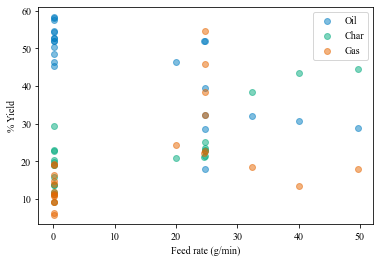

In [4]:
# Yield vs. feed rate, tubular reactor:

from matplotlib import pyplot as plt

inp_oil, tar_oil = get_inp_tar(rows_tr, 'Feed rate (g/min)', 'Oil')
inp_char, tar_char = get_inp_tar(rows_tr, 'Feed rate (g/min)', 'Char')
inp_gas, tar_gas = get_inp_tar(rows_tr, 'Feed rate (g/min)', 'Gas')

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Feed rate (g/min)')
plt.ylabel('% Yield')
plt.scatter(inp_oil, tar_oil, color=(0, 114/235, 178/235), label='Oil', alpha=0.5)
plt.scatter(inp_char, tar_char, color=(0, 158/235, 115/235), label='Char', alpha=0.5)
plt.scatter(inp_gas, tar_gas, color=(213/235, 94/235, 0), label='Gas', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

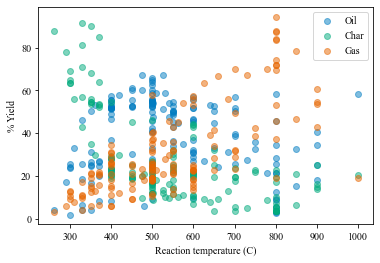

In [5]:
def get_all_yields(rows: List[dict], inp: str) -> Tuple[List[float]]:

    input = []
    oil = []
    char = []
    gas = []
    for row in rows:
        try:
            _i = float(row[inp])
            _o = float(row['Oil'])
            _c = float(row['Char'])
            _g = float(row['Gas'])
            input.append(_i)
            oil.append(_o)
            char.append(_c)
            gas.append(_g)
        except:
            continue

    return (input, oil, char, gas)

rows_all = rows_fb[:]
rows_all.extend(rows_br)
rows_all.extend(rows_tr)
temp, oil, char, gas = get_all_yields(rows_all, 'Temperature (C)')

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Reaction temperature (C)')
plt.ylabel('% Yield')
plt.scatter(temp, oil, color=(0, 114/235, 178/235), label='Oil', alpha=0.5)
plt.scatter(temp, char, color=(0, 158/235, 115/235), label='Char', alpha=0.5)
plt.scatter(temp, gas, color=(213/235, 94/235, 0), label='Gas', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

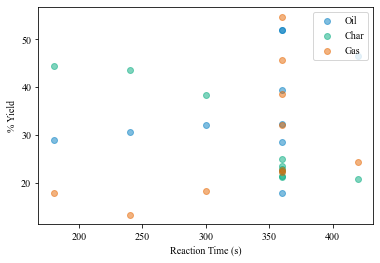

In [6]:
# Yield vs. reaction time, tubular reactor:

inp_oil, tar_oil = get_inp_tar(rows_tr, 'Reaction Time (s)', 'Oil')
inp_char, tar_char = get_inp_tar(rows_tr, 'Reaction Time (s)', 'Char')
inp_gas, tar_gas = get_inp_tar(rows_tr, 'Reaction Time (s)', 'Gas')

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Reaction Time (s)')
plt.ylabel('% Yield')
plt.scatter(inp_oil, tar_oil, color=(0, 114/235, 178/235), label='Oil', alpha=0.5)
plt.scatter(inp_char, tar_char, color=(0, 158/235, 115/235), label='Char', alpha=0.5)
plt.scatter(inp_gas, tar_gas, color=(213/235, 94/235, 0), label='Gas', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

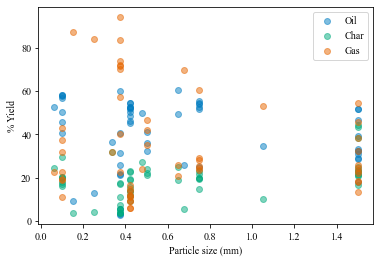

In [7]:
# Yield vs. particle size, tubular and batch reactor:

rows_tr_br = rows_tr[:]
rows_tr_br.extend(rows_br)

ps, oil, char, gas = get_all_yields(rows_tr_br, 'Particle size (mm)')

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Particle size (mm)')
plt.ylabel('% Yield')
plt.scatter(ps, oil, color=(0, 114/235, 178/235), label='Oil', alpha=0.5)
plt.scatter(ps, char, color=(0, 158/235, 115/235), label='Char', alpha=0.5)
plt.scatter(ps, gas, color=(213/235, 94/235, 0), label='Gas', alpha=0.5)
plt.legend(loc='upper right')
plt.show()